In [16]:

import numpy as np

import matplotlib.pyplot as plt
import random

In [13]:
X_train=np.loadtxt('train_X.csv',delimiter=',').T
Y_train=np.loadtxt('train_label.csv',delimiter=',').T

X_test=np.loadtxt('test_X.csv',delimiter=',').T
Y_test=np.loadtxt('test_label.csv',delimiter=',').T

In [14]:
print('shape of X-train',X_train.shape)
print('shape of Y-train',Y_train.shape)
print('shape of X-test',X_test.shape)
print('shape of X-test',Y_test.shape)

shape of X-train (784, 1000)
shape of Y-train (10, 1000)
shape of X-test (784, 350)
shape of X-test (10, 350)


## Getting random image

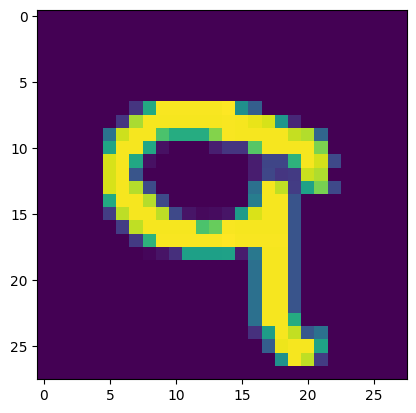

In [ ]:
index=random.randrange(0,X_train.shape[1]) #chosing the random image
plt.imshow(X_train[:,index].reshape(28,28)) #extracting, reshaping and display the image
plt.show()


## Creating Functions


In [81]:
def tanh(x):
    return np.tanh(x)
def relu(x):
    return np.maximum(x,0)
def softmax(x):
    x_shifted = x - np.max(x, axis=0, keepdims=True)  # Prevents overflow
    expX = np.exp(x_shifted)
    return expX / np.sum(expX, axis=0, keepdims=True)


In [77]:
def derivative_tanh(x):
    return (1-np.power(np.tanh(x),2))

def derivative_relu(x):
    return np.array(x>0,dtype=np.float32)



## Initialize Parameters

In [48]:
def initialize_parameters(n_x,n_h,n_y):
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1)) 

    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1)) 
    

    parameters={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2
    } 
    return parameters
     #n_x no. of neurons in input layer, n_h no. of neurons in hidden layers, n_x no. of neurons in output layer


## forward propagation

In [104]:
def forward_propagation(x,parameters):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']

    z1=np.dot(w1,x)+b1
    a1=tanh(z1)

    z2=np.dot(w2,a1)+b2
    a2=softmax(z2)

    forward_cache={
        "z1":z1,
        "a1":a1,
        "z2":z2,
        "a2":a2
    } 
    
    return forward_cache

## cost Function

In [105]:
def cost_function(a2, y):
    m = y.shape[1]
    epsilon = 1e-8  # very small number
    a2_clipped = np.clip(a2, epsilon, 1 - epsilon)  # keep values in (1e-8, 1 - 1e-8)
    cost = -(1/m) * np.sum(y * np.log(a2_clipped))
    return cost


## BackPropagation

In [106]:
def backward_prop(x,y,parameters,forward_cache):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]

    a1=forward_cache['a1']
    a2=forward_cache['a2']

    m=x.shape[1]

    dz2=(a2-y)
    dw2=(1/m)*np.dot(dz2,a1.T)
    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)

    dz1=(1/m)*np.dot(w2.T,dz2)*derivative_tanh(a1)
    dw1=(1/m)*np.dot(dz1,x.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)

    gradients={
        'dw1':dw1,
        'db1':db1,
        "dw2":dw2,
        "db2":db2,


    }

    return gradients



## Update Parameters

In [107]:
def update_parameters(parameters,gradients,learning_rate):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']

    dw1=gradients['dw1']
    db1=gradients['db1']
    dw2=gradients['dw2']
    db2=gradients['db2']

    w1=w1-learning_rate*dw1
    b1=b1-learning_rate*db1
    w2=w2-learning_rate*dw2
    b2=b2-learning_rate*db2

    parameters={
'w1':w1,
"b1":b1,
"w2":w2,
"b2":b2
    }

    return parameters

In [108]:
def model(x,y,n_h,learning_rate,iterations):
    n_x=x.shape[0]
    n_y=y.shape[0]
    cost_list=[]

    parameters=initialize_parameters(n_x,n_h,n_y)
    for i in range(iterations):
        forward_cache=forward_propagation(x,parameters)

        cost =cost_function(forward_cache["a2"],y)
        gradients=backward_prop(x,y,parameters,forward_cache)
        parameters=update_parameters(parameters,gradients,learning_rate)
        cost_list.append(cost)
        if(i%(iterations/10)==0):
            print('cost after ',i,"iterations is:",cost)


    return parameters,cost_list


In [113]:
iterations=1000
n_h=1000
learning_rate=0.002
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

cost after  0 iterations is: 2.3778153361068544
cost after  100 iterations is: 1.1975419441114858
cost after  200 iterations is: 0.8320087308094093
cost after  300 iterations is: 0.6608950554509941
cost after  400 iterations is: 0.5589691273480428
cost after  500 iterations is: 0.4894754694695424
cost after  600 iterations is: 0.4380006141328485
cost after  700 iterations is: 0.39771272495114196
cost after  800 iterations is: 0.3649338529105131
cost after  900 iterations is: 0.33749546524254653


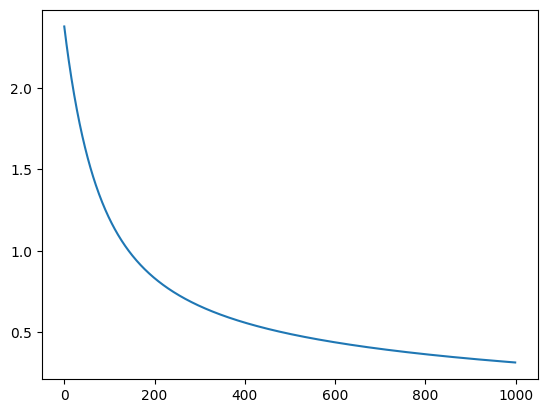

In [114]:
t=np.arange(0,iterations)
plt.plot(t,Cost_list)
plt.show()

In [115]:
def accuracy(inp,labels,parameters):
    forward_cache = forward_propagation(inp,parameters)
    a_out=forward_cache['a2']
    a_out=np.argmax(a_out,0)

    labels=np.argmax(labels,0)

    

    acc=np.mean(a_out==labels)*100
    return acc
    




In [116]:
print("Accuracy of Train Dataset is",accuracy(X_train,Y_train,Parameters),"%")
print("Accuracy of Test Dataset is",round(accuracy(X_test,Y_test,Parameters),2),"%")

Accuracy of Train Dataset is 94.89999999999999 %
Accuracy of Test Dataset is 84.29 %


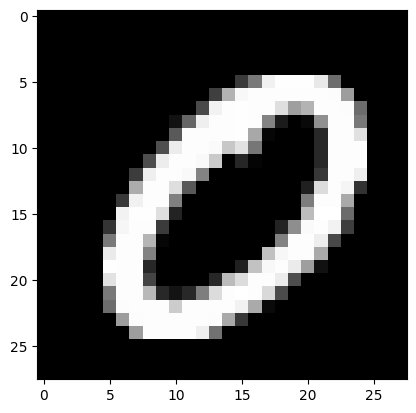

our model says it is  0


In [138]:
idx=int(random.randrange(0,X_test.shape[1]) )#chosing the random image
plt.imshow(X_test[:,idx].reshape((28,28)),cmap='gray') #extracting, reshaping and display the image
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("our model says it is ",a_pred[0])
